# Test Value Function Approximation method

In [1]:
import gymnasium as gym 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np 
import torch
import tensorflow as tf 
import matplotlib.pyplot as plt
import random
import os
import timeit
import datetime
from pathlib import Path

from environment import VFAFarmEnv
from algorithms import DQNAgent

2024-08-08 14:22:50.237894: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-08 14:22:50.329716: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-08 14:22:52.041834: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#define path to saving directory
TrainedDQLearning_model = Path('/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedDQLearning/Model')
TrainedDQLearning_data = Path('/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedDQLearning/Data')
TrainedDQLearning_plots = Path('/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedDQLearning/Plots') 

In [3]:
#initialize agent and environment
env = gym.make('VFAFarm-v0')
agent = DQNAgent(env)

/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/Final/final/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-08-08 14:23:55.388470: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-08 14:23:55.390120: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu f

### Training without replay buffer

In [4]:
agent = DQNAgent(env)
num_episodes = 1000
batch_size = 32

# Lists to store rewards and episode lengths
rewards = []
episode_lengths = []

for episode in range(num_episodes):
    state = env.reset()
    done = False
    total_reward = 0
    steps = 0

    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.train(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward
        steps += 1

    # Store the total reward and episode length
    rewards.append(total_reward)
    episode_lengths.append(steps)

    if episode % 10 == 0:
        agent.update_target_model()

    print(f"Episode: {episode}, Total Reward: {total_reward}, Steps: {steps}, Epsilon: {agent.epsilon:.4f}")

#saving the trained model for later
now = datetime.datetime.now()
formatted_time = now.strftime("%Y%m%d_%H%M%S")
filename = f"q_table_{num_episodes}_{formatted_time}.npy"
agent.save(TrainedDQLearning_model, f"DQN_final_{formatted_time}")


# Convert lists to numpy arrays for easier manipulation later
rewards = np.array(rewards)
episode_lengths = np.array(episode_lengths)

#saving the training results for later analysis
filename = f"rewards_{formatted_time}.npy"
if not os.path.exists(TrainedDQLearning_data):
    os.makedirs(TrainedDQLearning_data)
np.save(os.path.join(TrainedDQLearning_data,filename),rewards)

filename = f"episode_length_{formatted_time}.npy"
if not os.path.exists(TrainedDQLearning_data):
    os.makedirs(TrainedDQLearning_data)
np.save(os.path.join(TrainedDQLearning_data,filename), episode_lengths)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/Final/final/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:189: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(
/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/Final/final/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:213: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


**Log for training**
* first training 500 episodes, -v0 environment, no replay buffer, parameters:    `learning_rate=0.001, gamma=0.99, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01, batch_size=32, memory_size=10000`

* 20240809_205157: 1000 episodes, -v00 environment, no replay buffer, parameters: `learning_rate=0.001, gamma=0.99, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01, batch_size=32, memory_size=10000`

from this point are available also information on the environment evolution during training

* 20240810_123124: 100 episodes, -v00 environment, no replay buffer, parameters: `self, initial_sheep=0, initial_budget=2000, initial_year=0, prob_storm=0.3, prob_sheep=0.1, sheep_cost=1000, wheat_cost=20`

* 20240810_125246: 100 episodes, -v00 environment, no replay buffer, parameters: `self, initial_sheep=0, initial_budget=2000, initial_year=0, prob_storm=0.3, prob_sheep=0.1, sheep_cost=1000, wheat_cost=20` *with respect tu previous run the model.save method was corrected*

* : 1000 episodes, -v00 environment, replay buffer, parameters: `self, initial_sheep=0, initial_budget=2000, initial_year=0, prob_storm=0.3, prob_sheep=0.1, sheep_cost=1000, wheat_cost=20`

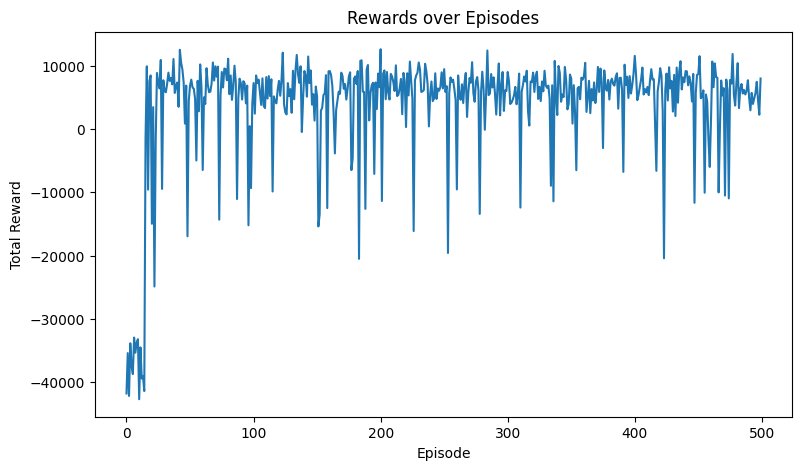

In [6]:
# Plot rewards
plt.figure(figsize=(9, 5))
plt.plot(rewards)
plt.title('Rewards over Episodes')
plt.xlabel('Episode')
plt.ylabel('Total Reward')

filename = f"rewards_{formatted_time}.png"
if not os.path.exists(TrainedDQLearning_plots):
    os.makedirs(TrainedDQLearning_plots)
file_path = TrainedDQLearning_plots / filename
plt.savefig(file_path)
plt.show()

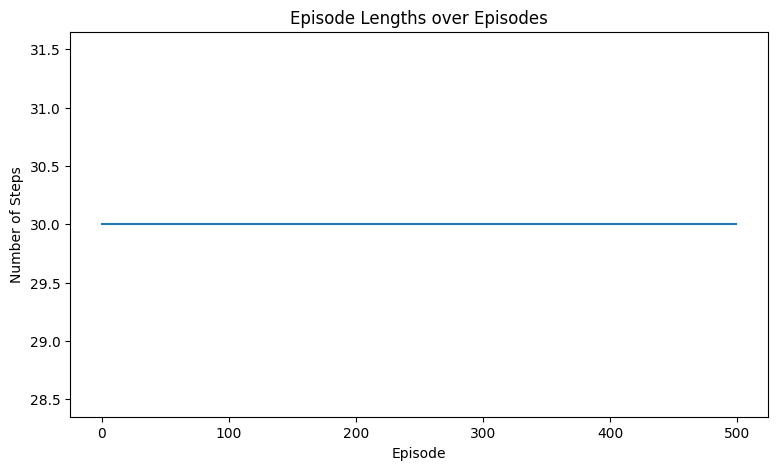

In [7]:
# Plot episode lengths
plt.figure(figsize=(9, 5))
plt.plot(episode_lengths)
plt.title('Episode Lengths over Episodes')
plt.xlabel('Episode')
plt.ylabel('Number of Steps')

#save 
filename = f"ep_length_{formatted_time}.png"
if not os.path.exists(TrainedDQLearning_plots):
    os.makedirs(TrainedDQLearning_plots)
file_path = TrainedDQLearning_plots / filename
plt.savefig(file_path)
plt.show()